# Keras and Tensorflow > 2.0

https://www.youtube.com/watch?v=H6du_pfuznE

In [248]:
import tensorflow as tf
import os
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Last Day Data

In [249]:
# import from lstm weather data (already scaled down, etc)
df = pd.read_csv('df.csv')
lastDay = df[-1:]
# lastDay

# Future Weather Data (Predicted)

In [250]:
# get 24 hours of weather prediction from each weather variable
# import file

weatherPred = pd.read_csv('weatherPred.csv')

In [251]:
daySin = df['Day sin'][0:24]
dayCos = df['Day cos'][0:24]
yearSin = df['Year sin'][0:24]
yearCos = df['Year cos'][0:24]

addFiles = [daySin, dayCos, yearSin, yearCos]
weatherPred['Day sin'] = daySin.values
weatherPred['Day cos'] = dayCos.values
weatherPred['Year sin'] = yearSin.values
weatherPred['Year cos'] = yearCos.values
weatherPred['Megawatts_2020'] = 0
weatherPred

,HLY_TEMP_NORMAL_SF,HLY_TEMP_10PCTL_SF,HLY_TEMP_90PCTL_SF,HLY_DEWP_NORMAL_SF,HLY_DEWP_10PCTL_SF,HLY_DEWP_90PCTL_SF,HLY_PRES_NORMAL_SF,HLY_PRES_10PCTL_SF,HLY_PRES_90PCTL_SF,HLY_CLDH_NORMAL_SF,...,HLY_WIND_VCTSPD_SF,HLY_WIND_1STDIR_SF,HLY_WIND_1STPCT_SF,HLY_WIND_2NDDIR_SF,HLY_WIND_2NDPCT_SF,Day sin,Day cos,Year sin,Year cos,Megawatts_2020
0,0.101379,0.145648,0.066059,0.106914,0.110384,0.084065,0.489921,0.256648,0.522918,0.052821,...,0.072180,0.327146,0.085838,0.433005,0.133807,-5.030095e-12,1.000000e+00,0.002021,0.999998,0
1,0.077837,0.111836,0.051733,0.084253,0.087554,0.067474,0.409635,0.209910,0.443549,0.045902,...,0.057604,0.211218,0.067105,0.414497,0.099160,2.588190e-01,9.659258e-01,0.002738,0.999996,0
2,0.052645,0.076908,0.039868,0.057208,0.059310,0.047732,0.312642,0.143479,0.338343,0.036108,...,0.043019,0.152076,0.046586,0.309725,0.064297,5.000000e-01,8.660254e-01,0.003455,0.999994,0
3,0.031359,0.040533,0.025303,0.032732,0.033467,0.028703,0.190861,0.078838,0.213248,0.023617,...,0.026541,0.091241,0.028712,0.178405,0.036767,7.071068e-01,7.071068e-01,0.004172,0.999991,0
4,0.021401,0.026385,0.018360,0.022243,0.022662,0.020184,0.122756,0.045242,0.138703,0.017597,...,0.019053,0.048393,0.020081,0.120719,0.024021,8.660254e-01,5.000000e-01,0.004888,0.999988,0
5,0.012760,0.015002,0.011524,0.013143,0.013328,0.012262,0.071378,0.024155,0.082923,0.011174,...,0.011810,0.025981,0.012193,0.068259,0.013876,9.659258e-01,2.588190e-01,0.005605,0.999984,0
6,0.014104,0.014917,0.013594,0.014233,0.014299,0.013889,0.032132,0.018225,0.038588,0.013456,...,0.013704,0.019095,0.013880,0.030467,0.014557,1.000000e+00,7.593439e-12,0.006322,0.999980,0
7,0.021046,0.021518,0.020765,0.021125,0.021165,0.020933,0.034339,0.023389,0.037877,0.020691,...,0.020829,0.023741,0.020922,0.033673,0.021292,9.659258e-01,-2.588190e-01,0.007039,0.999975,0
8,0.045653,0.046120,0.045384,0.045731,0.045770,0.045543,0.058106,0.048022,0.061512,0.045310,...,0.045445,0.048428,0.045532,0.057246,0.045894,8.660254e-01,-5.000000e-01,0.007756,0.999970,0
9,0.108183,0.108478,0.108005,0.108231,0.108256,0.108109,0.115480,0.109669,0.117708,0.107957,...,0.108044,0.109937,0.108104,0.114952,0.108341,7.071068e-01,-7.071068e-01,0.008472,0.999964,0


In [252]:
weatherData = weatherPred
# print(weatherData.iloc[0, :]) #row, col
# weatherData.append(future_outputs[0][-1]) #add the new megawatts prediction into the set
weatherData.at[0, -1:] = 3
counter = 0
print(weatherData.iloc[counter, -1:])
oneElt = np.array(weatherData.iloc[counter, :])
print("{} hour input {}".format(1, oneElt))
# weatherData=weatherData.reshape(1,-1)
# weatherData = weatherData.reshape((1, timesteps, numVars)) #works
# yhat = model.predict(weatherData, verbose=0)
# print("{} hour output {}".format(i,yhat))
# future_outputs.extend(yhat.tolist())

Megawatts_2020    3.0
Name: 0, dtype: float64
1 hour input [ 1.01379210e-01  1.45648480e-01  6.60585600e-02  1.06914030e-01
  1.10384100e-01  8.40654700e-02  4.89921100e-01  2.56648270e-01
  5.22918460e-01  5.28208460e-02  4.91231530e-01  3.11063700e-01
  1.01410076e-01  1.18088290e-01  2.45527310e-01  3.47453030e-01
  1.01379210e-01  1.04611800e-01  9.27421900e-02  4.00874670e-01
  3.41205030e-01  7.21799950e-02  3.27145800e-01  8.58380600e-02
  4.33004830e-01  1.33806810e-01 -5.03009464e-12  1.00000000e+00
  2.02132493e-03  9.99997957e-01  3.00000000e+00]


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


In [253]:
import joblib
cols = df.columns 
scaler_filename = cols[0] +'.save'
print(scaler_filename)
scaler = joblib.load(scaler_filename) 

HLY_TEMP_NORMAL_SF.save


# Predict into the future

In [254]:
from tensorflow import keras
model = keras.models.load_model('model')

In [255]:
from numpy import array

def futurePredictions(lastDay_input, weatherData, hourPred, timesteps, numVars):
    future_outputs=[]
    i=0
    counter = 0
    while(i<hourPred): #for the next thirty hours
        if i == 0: #for the first new predicted value, using old weather data to predict new value 
            lastDay_input = np.array(lastDay_input)
            lastDay_input = lastDay_input.reshape(1, timesteps, numVars)
            yhat = model.predict(lastDay_input, verbose=0)#.flatten()
            print(yhat[0])
#             future_outputs.extend(yhat.tolist())
            future_outputs.append(yhat[0][0])
            i=i+1
        else:# then take from the 1 position and getting the new input and putting it into input
            print(future_outputs[counter])
            setVal = future_outputs[counter].item()
            weatherData.at[counter, -1:] = setVal #set the megawatts val from the prev predicted
            oneData = np.array(weatherData.iloc[counter, :]) #one day of data 
            print("{} hour input {}".format(1, oneData))
            oneData = oneData.reshape((1, timesteps, numVars)) #works
            yhat = model.predict(oneData, verbose=0)
            print("{} hour output {}".format(i,yhat))
#             future_outputs.extend(yhat.tolist())
            future_outputs.append(yhat[0][0])
            i=i+1
            counter+=1

    return future_outputs
    

In [256]:
lst_output = futurePredictions(lastDay, weatherPred, 24, 1, 31)

[0.4955374]
0.4955374
1 hour input [ 1.01379210e-01  1.45648480e-01  6.60585600e-02  1.06914030e-01
  1.10384100e-01  8.40654700e-02  4.89921100e-01  2.56648270e-01
  5.22918460e-01  5.28208460e-02  4.91231530e-01  3.11063700e-01
  1.01410076e-01  1.18088290e-01  2.45527310e-01  3.47453030e-01
  1.01379210e-01  1.04611800e-01  9.27421900e-02  4.00874670e-01
  3.41205030e-01  7.21799950e-02  3.27145800e-01  8.58380600e-02
  4.33004830e-01  1.33806810e-01 -5.03009464e-12  1.00000000e+00
  2.02132493e-03  9.99997957e-01  4.95537400e-01]
1 hour output [[0.40513158]]
0.40513158
1 hour input [0.07783702 0.11183561 0.0517332  0.08425336 0.08755364 0.06747413
 0.40963465 0.20991047 0.4435489  0.04590214 0.41490626 0.25198257
 0.07946253 0.08272275 0.19416404 0.28933617 0.07783702 0.08019371
 0.07174222 0.355271   0.27117184 0.05760366 0.21121782 0.06710505
 0.41449735 0.09915964 0.25881905 0.96592583 0.00273811 0.99999625
 0.40513158]
2 hour output [[0.3598835]]
0.3598835
1 hour input [0.05264

# Check if it works

:/ scary

In [257]:
lst_output

[0.4955374,
 0.40513158,
 0.3598835,
 0.32341522,
 0.2881478,
 0.27434015,
 0.2696743,
 0.26986182,
 0.27526283,
 0.27364957,
 0.27533764,
 0.28361076,
 0.30474722,
 0.3354597,
 0.37669456,
 0.43245298,
 0.4942832,
 0.54614025,
 0.5691601,
 0.56576645,
 0.5382658,
 0.49283648,
 0.44223934,
 0.39015818]

In [258]:
scaler_filename = 'Megawatts_2019.save'
print(scaler_filename)
megawattsScaler = joblib.load(scaler_filename)

Megawatts_2019.save


In [286]:
predictedVals = megawattsScaler.inverse_transform(np.array(lst_output).reshape(-1,1))
predicted24Hours = pd.DataFrame(predictedVals)
predicted24Hours

,0
0,272657.468750
1,226569.046875
2,203501.796875
3,184910.468750
4,166931.312500
5,159892.234375
6,157513.609375
7,157609.203125
8,160362.625000
9,159540.187500


In [287]:
check_directory = '/Users/yukahatori/A_Fairness/FairnessML_git/NOAA_and_CAISO_Data_2020/'
compFiles = [f for f in listdir(check_directory) if isfile(join(check_directory, f))] 
flies = []
for file in compFiles:
    print(file)
    flies.append(check_directory + file)
df1 = pd.read_csv(flies[2])
actual24Hours = df1['Megawatts_2020'][:24]

SAC-NOAA-and-Megawatts.csv
SD-NOAA-and-Megawatts.csv
SF-NOAA-and-Megawatts.csv
LA-NOAA-and-Megawatts.csv


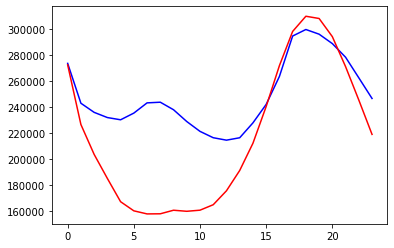

In [288]:
import matplotlib.pyplot as plt

plt.plot(actual24Hours, color = 'blue')
plt.plot(predicted24Hours, color = 'red')
plt.show()

In [325]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(actual24Hours, predicted24Hours, squared=False)
print(rms)

45246.847256188215


In [324]:
import math
def rmse(actual, predicted):
    predictedVals = list(predicted)
    sumOf = 0
    for i in range(len(predicted)):
        oneVal = pow(actual[i][0] - predicted[i], 2)
        sumOf +=oneVal
    sumOf = sumOf/ len(predicted)
    sumOf = math.sqrt(sumOf)
    return sumOf

sumOf = rmse(predictedVals, actual24Hours)
print(sumOf)

45246.847256188215
